In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib

In [2]:
ellipsis_df = pd.read_csv('/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/ELLie.csv', sep = ",", index_col= 0)

ellipsis_df

,ID,Condition,Sentence,Construction,Semantic_Role,Standard_Filler_position_GPT,Standard_Filler_position_BERT,Elliptical_Filler_position_GPT,Elliptical_Filler_position_BERT,Standard_filler,Elliptical_filler,Score1_BERT,Score2_BERT,Score1_GPT,Score2_GPT
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,0,1,0,8,photographer,reporter,-3.079777,-4.335385,NaN,NaN
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,0,1,0,8,photographer,butcher,-4.711823,-9.372536,NaN,NaN
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,0,1,0,8,grandfather,reporter,-10.543612,-7.062604,NaN,NaN
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,0,1,0,8,grandfather,butcher,-7.773522,-8.805918,NaN,NaN
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,0,1,0,8,photographer,bike,-5.308974,-8.480192,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,6,6,14,14,departure,move,-2.391249,-6.001656,-7.086737,-6.658537
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,6,6,14,14,departure,party,-2.997682,-4.430182,-7.086737,-6.353322
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,7,7,15,15,meeting,move,-5.674508,-7.160135,-6.472381,-6.965591
573,115,AT – AT,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,7,7,15,15,meeting,party,-5.556836,-4.355678,-6.472381,-5.674573


In [3]:
#drop out Agent-rows since for GPT they have Nan values 'cause we didn't compute score prob for this sem-role

ellipsis_df.drop(ellipsis_df[ellipsis_df['Semantic_Role'] == 'Agent'].index, inplace=True)
ellipsis_df

,ID,Condition,Sentence,Construction,Semantic_Role,Standard_Filler_position_GPT,Standard_Filler_position_BERT,Elliptical_Filler_position_GPT,Elliptical_Filler_position_BERT,Standard_filler,Elliptical_filler,Score1_BERT,Score2_BERT,Score1_GPT,Score2_GPT
125,26,T – T,"The journalist writes an article, and the prof...",Gapping,Patient,4,4,10,10,article,book,-0.513191,-3.693677,-1.057304,-1.476517
126,26,T – AT,"The journalist writes an article, and the prof...",Gapping,Patient,4,4,10,10,article,magazine,-0.571700,-8.179724,-1.057304,-6.149436
127,26,AT – T,"The journalist writes a song, and the professo...",Gapping,Patient,4,4,10,10,song,book,-6.100311,-4.297268,-6.491539,-1.772749
128,26,AT – AT,"The journalist writes a song, and the professo...",Gapping,Patient,4,4,10,10,song,magazine,-6.153050,-7.637376,-6.491539,-7.277339
129,26,T – SP violation,"The journalist writes an article, and the prof...",Gapping,Patient,4,4,10,10,article,apple,-1.309105,-9.594118,-1.057304,-11.709642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,6,6,14,14,departure,move,-2.391249,-6.001656,-7.086737,-6.658537
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,6,6,14,14,departure,party,-2.997682,-4.430182,-7.086737,-6.353322
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,7,7,15,15,meeting,move,-5.674508,-7.160135,-6.472381,-6.965591
573,115,AT – AT,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,7,7,15,15,meeting,party,-5.556836,-4.355678,-6.472381,-5.674573


In [18]:
def filler_boxplot(df, score_number, plot_type):
    if plot_type == "general":
        if score_number == 1:

            my_colors = ["skyblue", "skyblue", 'crimson', 'crimson', "skyblue"]
            ax = sns.boxplot(data=df, x="Condition", y="Score1_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T1 (T1-T2)', 'T (T-AT)','AT (AT-T)', 'AT1 (AT1-AT2)', 'T (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_General_filler_prob_standard_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_General_filler_prob_standard_part.tex")
            return ax

        elif score_number ==2:
            my_colors = ["skyblue", "crimson", 'skyblue', 'crimson', "darkorange"]
            ax = sns.boxplot(data=df, x="Condition", y="Score2_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T2 (T1-T2)', 'AT (T-AT)','T (AT-T)', 'AT2 (AT1-AT2)', 'viol (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_General_filler_prob_elliptical_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_General_filler_prob_elliptical_part.tex")
            return ax


    elif plot_type == "patient":

        df = df[df['Semantic_Role'] == 'Patient']

        if score_number == 1:
            my_colors = ["skyblue", "skyblue", 'crimson', 'crimson', "skyblue"]
            ax = sns.boxplot(data=df, x="Condition", y="Score1_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T1 (T1-T2)', 'T (T-AT)','AT (AT-T)', 'AT1 (AT1-AT2)', 'T (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Patient_filler_prob_standard_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Patient_filler_prob_standard_part.tex")
            return ax

        elif score_number ==2:
            my_colors = ["skyblue", "crimson", 'skyblue', 'crimson', "darkorange"]
            ax = sns.boxplot(data=df, x="Condition", y="Score2_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T2 (T1-T2)', 'AT (T-AT)','T (AT-T)', 'AT2 (AT1-AT2)', 'viol (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Patient_filler_prob_elliptical_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Patient_filler_prob_elliptical_part.tex")
            return ax

    elif plot_type == "instrument":

        df = df[df['Semantic_Role'] == 'Instrument']

        if score_number == 1:
            my_colors = ["skyblue", "skyblue", 'crimson', 'crimson', "skyblue"]
            ax = sns.boxplot(data=df, x="Condition", y="Score1_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T1 (T1-T2)', 'T (T-AT)','AT (AT-T)', 'AT1 (AT1-AT2)', 'T (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Instrument_filler_prob_standard_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Instrument_filler_prob_standard_part.tex")
            return ax

        elif score_number ==2:
            my_colors = ["skyblue", "crimson", 'skyblue', 'crimson', "darkorange"]
            ax = sns.boxplot(data=df, x="Condition", y="Score2_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T2 (T1-T2)', 'AT (T-AT)','T (AT-T)', 'AT2 (AT1-AT2)', 'viol (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Instrument_filler_prob_elliptical_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Instrument_filler_prob_elliptical_part.tex")
            return ax

    elif plot_type == "location":
        df = df[df['Semantic_Role'] == 'Location']
        if score_number == 1:
            my_colors = ["skyblue", "skyblue", 'crimson', 'crimson', "skyblue"]
            ax = sns.boxplot(data=df, x="Condition", y="Score1_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T1 (T1-T2)', 'T (T-AT)','AT (AT-T)', 'AT1 (AT1-AT2)', 'T (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Location_filler_prob_standard_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Location_filler_prob_standard_part.tex")
            return ax

        elif score_number ==2:
            my_colors = ["skyblue", "crimson", 'skyblue', 'crimson', "darkorange"]
            ax = sns.boxplot(data=df, x="Condition", y="Score2_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T2 (T1-T2)', 'AT (T-AT)','T (AT-T)', 'AT2 (AT1-AT2)', 'viol (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Location_filler_prob_elliptical_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Location_filler_prob_elliptical_part.tex")
            return ax

    elif plot_type == "time":

        df = df[df['Semantic_Role'] == 'Time']

        if score_number == 1:
            my_colors = ["skyblue", "skyblue", 'crimson', 'crimson', "skyblue"]
            ax = sns.boxplot(data=df, x="Condition", y="Score1_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T1 (T1-T2)', 'T (T-AT)','AT (AT-T)', 'AT1 (AT1-AT2)', 'T (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Time_filler_prob_standard_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Time_filler_prob_standard_part.tex")
            return ax

        elif score_number ==2:
            my_colors = ["skyblue", "crimson", 'skyblue', 'crimson', "darkorange"]
            ax = sns.boxplot(data=df, x="Condition", y="Score2_GPT", width=0.5, palette = my_colors)
            sns.set_style("ticks")
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set_xticklabels(['T2 (T1-T2)', 'AT (T-AT)','T (AT-T)', 'AT2 (AT1-AT2)', 'viol (T-viol)'])
            plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Time_filler_prob_elliptical_part.png")
            tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Time_filler_prob_elliptical_part.tex")
            return ax




def boxplot_pairCondition_comparison(df, score_column1, score_column2, plot_type):

    if plot_type == "general":

        T_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        T_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        AT_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        AT_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        T_viol1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]
        T_viol2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]

        data = [T_T1, T_T2, T_AT1, T_AT2, AT_T1, AT_T2 , AT_AT1, AT_AT2, T_viol1, T_viol2]


        my_colors = ["steelblue", "steelblue", "steelblue", "crimson", "crimson","steelblue","crimson","crimson","steelblue","darkorange"]
        ax = sns.boxplot(data=data, width=0.5,palette = my_colors)

        sns.set_style("ticks")

        #ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['(T','T)', '(T','AT)', '(AT','T)', '(AT', 'AT)', '(T', 'v)'])
        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_General_filler_prob_pairCond.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_General_filler_prob_pairCond.tex")
        return ax

    elif plot_type == "patient":

        df = df[df['Semantic_Role'] == 'Patient']
        T_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        T_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        AT_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        AT_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        T_viol1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]
        T_viol2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]

        data = [T_T1, T_T2, T_AT1, T_AT2, AT_T1, AT_T2 , AT_AT1, AT_AT2, T_viol1, T_viol2]

        my_colors = ["steelblue", "steelblue", "steelblue", "crimson", "crimson","steelblue","crimson","crimson","steelblue","darkorange"]
        ax = sns.boxplot(data=data, width=0.5,palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['(T-','-T)', '(T-','-AT)', '(AT-','-T)', '(AT-', '-AT)', '(T-', '-viol)'])
        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Patient_filler_prob_pairCond.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Patient_filler_prob_pairCond.tex")
        return ax

    elif plot_type == "instrument":

        df = df[df['Semantic_Role'] == 'Instrument']
        T_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        T_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        AT_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        AT_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        T_viol1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]
        T_viol2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]

        data = [T_T1, T_T2, T_AT1, T_AT2, AT_T1, AT_T2 , AT_AT1, AT_AT2, T_viol1, T_viol2]

        my_colors = ["steelblue", "steelblue", "steelblue", "crimson", "crimson","steelblue","crimson","crimson","steelblue","darkorange"]
        ax = sns.boxplot(data=data, width=0.5,palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['(T-','-T)', '(T-','-AT)', '(AT-','-T)', '(AT-', '-AT)', '(T-', '-viol)'])
        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Instrument_filler_prob_pairCond.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Instrument_filler_prob_pairCond.tex")
        return ax

    elif plot_type == "location":

        df = df[df['Semantic_Role'] == 'Location']
        T_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        T_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        AT_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        AT_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        T_viol1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]
        T_viol2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]

        data = [T_T1, T_T2, T_AT1, T_AT2, AT_T1, AT_T2 , AT_AT1, AT_AT2, T_viol1, T_viol2]

        my_colors = ["steelblue", "steelblue", "steelblue", "crimson", "crimson","steelblue","crimson","crimson","steelblue","darkorange"]
        ax = sns.boxplot(data=data, width=0.5,palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['(T-','-T)', '(T-','-AT)', '(AT-','-T)', '(AT-', '-AT)', '(T-', '-viol)'])
        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Location_filler_prob_pairCond.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Location_filler_prob_pairCond.tex")
        return ax

    elif plot_type == "time":

        df = df[df['Semantic_Role'] == 'Time']
        T_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – T"]
        T_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        T_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – AT"]
        AT_T1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_T2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – T"]
        AT_AT1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        AT_AT2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "AT – AT"]
        T_viol1 = [row[score_column1] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]
        T_viol2 = [row[score_column2] for index, row in df.iterrows() if row['Condition'] == "T – SP violation"]

        data = [T_T1, T_T2, T_AT1, T_AT2, AT_T1, AT_T2 , AT_AT1, AT_AT2, T_viol1, T_viol2]

        my_colors = ["steelblue", "steelblue", "steelblue", "crimson", "crimson","steelblue","crimson","crimson","steelblue","darkorange"]
        ax = sns.boxplot(data=data, width=0.5,palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['(T-','-T)', '(T-','-AT)', '(AT-','-T)', '(AT-', '-AT)', '(T-', '-viol)'])
        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Time_filler_prob_pairCond.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Time_filler_prob_pairCond.tex")
        return ax





def boxplot_sentPart_comparison(df, score_column1, score_column2, plot_type):

    if plot_type == "general":

        T_T = df[df['Condition'] ==  "T – T" ]
        T_AT = df[df['Condition'] ==  "T – AT" ]
        T_viol = df[df['Condition'] ==  "T – SP violation" ]
        AT_T = df[df['Condition'] ==  "AT – T" ]
        AT_AT = df[df['Condition'] ==  "AT – AT" ]



        T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
        T1_score = [row[score_column1] for index, row in T1.iterrows()]


        T2 = pd.concat([T_T, AT_T,], ignore_index=True)
        T2_score = [row[score_column2] for index, row in T2.iterrows()]

        AT1 = pd.concat([AT_T, AT_AT,], ignore_index=True)
        AT1_score = [row[score_column1] for index, row in AT1.iterrows()]

        AT2 = pd.concat([T_AT, AT_AT,], ignore_index=True)
        AT2_score = [row[score_column2] for index, row in AT2.iterrows()]

        viol_score = [row[score_column2] for index, row in T_viol.iterrows()]

        data = [T1_score, T2_score, AT1_score, AT2_score, viol_score]

        my_colors = ['skyblue', 'steelblue', 'r', 'crimson', "darkorange" ]
        ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['T_SPart','T_EPart', 'AT_SPart', 'AT_EPart', 'viol_EPart'])

        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_General_filler_prob_SentPart.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_General_filler_prob_SentPart.tex")
        return ax

    elif plot_type == "patient":

        df = df[df['Semantic_Role'] == 'Patient']
        T_T = df[df['Condition'] ==  "T – T" ]
        T_AT = df[df['Condition'] ==  "T – AT" ]
        T_viol = df[df['Condition'] ==  "T – SP violation" ]
        AT_T = df[df['Condition'] ==  "AT – T" ]
        AT_AT = df[df['Condition'] ==  "AT – AT" ]

        T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
        T1_score = [row[score_column1] for index, row in T1.iterrows()]

        T2 = pd.concat([T_T, AT_T,], ignore_index=True)
        T2_score = [row[score_column2] for index, row in T2.iterrows()]

        AT1 = pd.concat([AT_T, AT_AT,], ignore_index=True)
        AT1_score = [row[score_column1] for index, row in AT1.iterrows()]

        AT2 = pd.concat([T_AT, AT_AT,], ignore_index=True)
        AT2_score = [row[score_column2] for index, row in AT2.iterrows()]


        viol_score = [row[score_column2] for index, row in T_viol.iterrows()]

        data = [T1_score, T2_score, AT1_score, AT2_score, viol_score]

        my_colors = ['skyblue', 'steelblue', 'r', 'crimson', "darkorange" ]
        ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['T_SPart','T_EPart', 'AT_SPart', 'AT_EPart', 'viol_EPart'])

        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Patient_filler_prob_SentPart.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Patient_filler_prob_SentPart.tex")
        return ax

    elif plot_type == "instrument":
        df = df[df['Semantic_Role'] == 'Instrument']

        T_T = df[df['Condition'] ==  "T – T" ]
        T_AT = df[df['Condition'] ==  "T – AT" ]
        T_viol = df[df['Condition'] ==  "T – SP violation" ]
        AT_T = df[df['Condition'] ==  "AT – T" ]
        AT_AT = df[df['Condition'] ==  "AT – AT" ]

        T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
        T1_score = [row[score_column1] for index, row in T1.iterrows()]

        T2 = pd.concat([T_T, AT_T,], ignore_index=True)
        T2_score = [row[score_column2] for index, row in T2.iterrows()]

        AT1 = pd.concat([AT_T, AT_AT,], ignore_index=True)
        AT1_score = [row[score_column1] for index, row in AT1.iterrows()]

        AT2 = pd.concat([T_AT, AT_AT,], ignore_index=True)
        AT2_score = [row[score_column2] for index, row in AT2.iterrows()]


        viol_score = [row[score_column2] for index, row in T_viol.iterrows()]

        data = [T1_score, T2_score, AT1_score, AT2_score, viol_score]

        my_colors = ['skyblue', 'steelblue', 'r', 'crimson', "darkorange" ]
        ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['T_SPart','T_EPart', 'AT_SPart', 'AT_EPart', 'viol_EPart'])

        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Instrument_filler_prob_SentPart.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Instrument_filler_prob_SentPart.tex")
        return ax

    elif plot_type == "location":

        df = df[df['Semantic_Role'] == 'Location']
        T_T = df[df['Condition'] ==  "T – T" ]
        T_AT = df[df['Condition'] ==  "T – AT" ]
        T_viol = df[df['Condition'] ==  "T – SP violation" ]
        AT_T = df[df['Condition'] ==  "AT – T" ]
        AT_AT = df[df['Condition'] ==  "AT – AT" ]

        T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
        T1_score = [row[score_column1] for index, row in T1.iterrows()]

        T2 = pd.concat([T_T, AT_T,], ignore_index=True)
        T2_score = [row[score_column2] for index, row in T2.iterrows()]

        AT1 = pd.concat([AT_T, AT_AT,], ignore_index=True)
        AT1_score = [row[score_column1] for index, row in AT1.iterrows()]

        AT2 = pd.concat([T_AT, AT_AT,], ignore_index=True)
        AT2_score = [row[score_column2] for index, row in AT2.iterrows()]


        viol_score = [row[score_column2] for index, row in T_viol.iterrows()]

        data = [T1_score, T2_score, AT1_score, AT2_score, viol_score]

        my_colors = ['skyblue', 'steelblue', 'r', 'crimson', "darkorange" ]
        ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['T_SPart','T_EPart', 'AT_SPart', 'AT_EPart', 'viol_EPart'])

        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Location_filler_prob_SentPart.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Location_filler_prob_SentPart.tex")
        return ax

    elif plot_type == "time":

        df = df[df['Semantic_Role'] == 'Time']
        T_T = df[df['Condition'] ==  "T – T" ]
        T_AT = df[df['Condition'] ==  "T – AT" ]
        T_viol = df[df['Condition'] ==  "T – SP violation" ]
        AT_T = df[df['Condition'] ==  "AT – T" ]
        AT_AT = df[df['Condition'] ==  "AT – AT" ]

        T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
        T1_score = [row[score_column1] for index, row in T1.iterrows()]

        T2 = pd.concat([T_T, AT_T,], ignore_index=True)
        T2_score = [row[score_column2] for index, row in T2.iterrows()]

        AT1 = pd.concat([AT_T, AT_AT,], ignore_index=True)
        AT1_score = [row[score_column1] for index, row in AT1.iterrows()]

        AT2 = pd.concat([T_AT, AT_AT,], ignore_index=True)
        AT2_score = [row[score_column2] for index, row in AT2.iterrows()]


        viol_score = [row[score_column2] for index, row in T_viol.iterrows()]

        data = [T1_score, T2_score, AT1_score, AT2_score, viol_score]

        my_colors = ['skyblue', 'steelblue', 'r', 'crimson', "darkorange" ]
        ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

        sns.set_style("ticks")

        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_xticklabels(['T_SPart','T_EPart', 'AT_SPart', 'AT_EPart', 'viol_EPart'])

        plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Time_filler_prob_SentPart.png")
        tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Time_filler_prob_SentPart.tex")
        return ax




def boxplot_comparison_typical(df, score_column1, score_column2):
    T_T = df[df['Condition'] ==  "T – T" ]
    T_AT = df[df['Condition'] ==  "T – AT" ]
    T_viol = df[df['Condition'] ==  "T – SP violation" ]
    AT_T = df[df['Condition'] ==  "AT – T" ]
    AT_AT = df[df['Condition'] ==  "AT – AT" ]



    T1 = pd.concat([T_T, T_AT, T_viol], ignore_index=True)
    T1_score = [row[score_column1] for index, row in T1.iterrows()]

    AT2 = pd.concat([T_AT, AT_AT], ignore_index=True)
    T2_score = [row[score_column2] for index, row in AT2.iterrows()]


    data = [T1_score, T2_score]

    my_colors = ['skyblue', 'steelblue' ]
    ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

    sns.set_style("ticks")

    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_xticklabels(['Typical fillers(SPart)','Typical fillers(EPart)'])

    plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Typical_filler_prob_SentPart.png")
    tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Typical_filler_prob_SentPart.tex")
    return ax





def boxplot_comparison_atypical_viol(df, score_column1, score_column2):
    T_T = df[df['Condition'] ==  "T – T" ]
    T_AT = df[df['Condition'] ==  "T – AT" ]
    T_viol = df[df['Condition'] ==  "T – SP violation" ]
    AT_T = df[df['Condition'] ==  "AT – T" ]
    AT_AT = df[df['Condition'] ==  "AT – AT" ]



    T1 = pd.concat([AT_T, AT_AT], ignore_index=True)
    T1_score = [row[score_column1] for index, row in T1.iterrows()]

    AT2 = pd.concat([T_AT, AT_AT], ignore_index=True)
    T2_score = [row[score_column2] for index, row in AT2.iterrows()]

    viol_score = [row[score_column2] for index, row in T_viol.iterrows()]
    data = [T1_score, T2_score, viol_score]

    my_colors = ['r', 'crimson', "darkorange"]
    ax = sns.boxplot(data=data, width=0.5, palette = my_colors)

    sns.set_style("ticks")

    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_xticklabels(['Atypical fillers(SPart)','Atypical fillers(EPart)', 'SP viol(EPart)'])

    plt.savefig("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/GPT_Atypical_viol_filler_prob_SentPart.png")
    tikzplotlib.save("/Users/caput/ELLie-ellipsis_and_thematic_fit_with_TLMs/Plots/GPT_Filler_prob/file_tex/GPT_Atypical_viol_filler_prob_SentPart.tex")
    return ax




<AxesSubplot:>

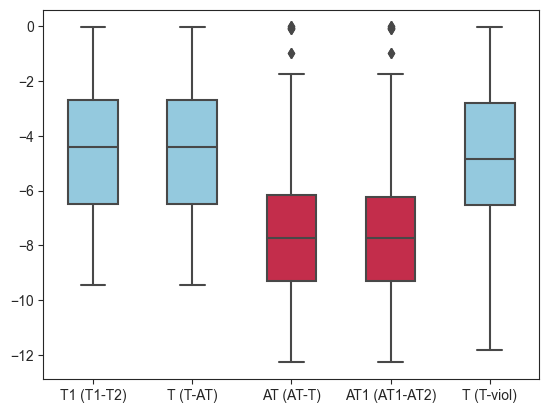

In [138]:
filler_boxplot(ellipsis_df, 1, "general")

<AxesSubplot:>

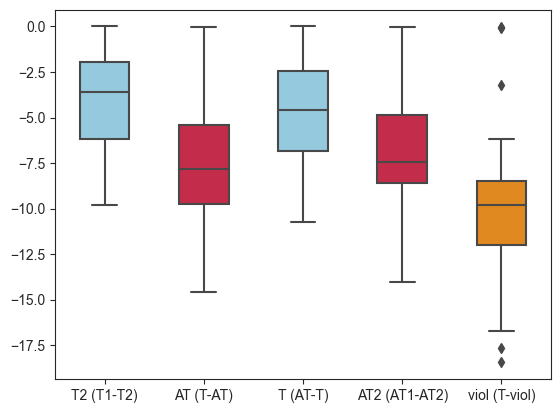

In [139]:
filler_boxplot(ellipsis_df, 2, "general")

<AxesSubplot:>

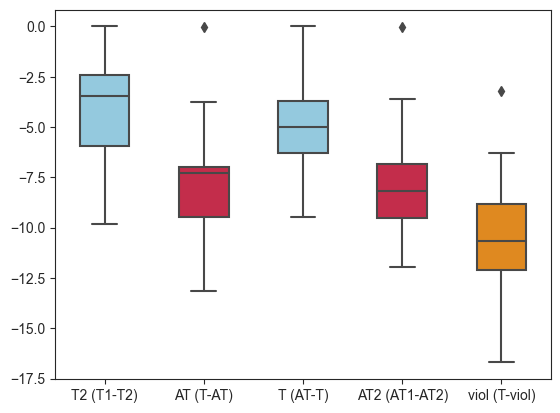

In [140]:
filler_boxplot(ellipsis_df,  2, 'location')

<AxesSubplot:>

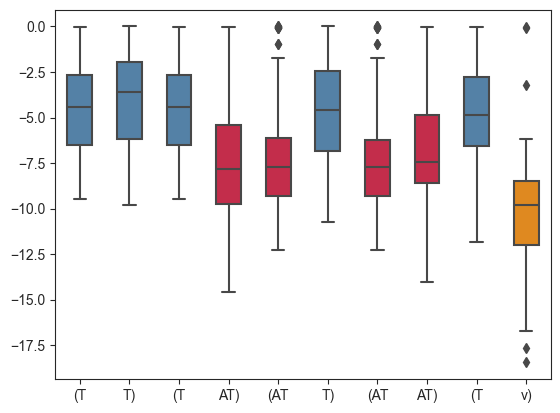

In [20]:
boxplot_pairCondition_comparison(ellipsis_df, 'Score1_GPT', 'Score2_GPT', "general")

<AxesSubplot:>

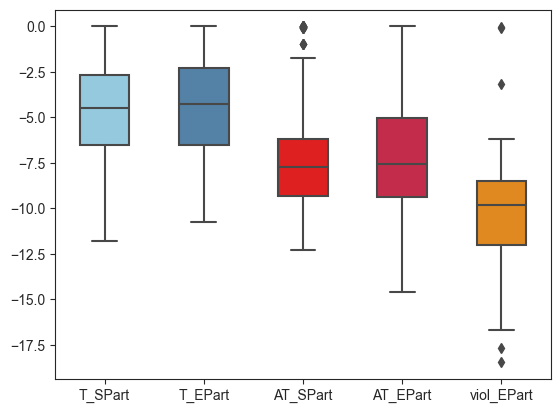

In [142]:
boxplot_sentPart_comparison(ellipsis_df, 'Score1_GPT', 'Score2_GPT', "general")

<AxesSubplot:>

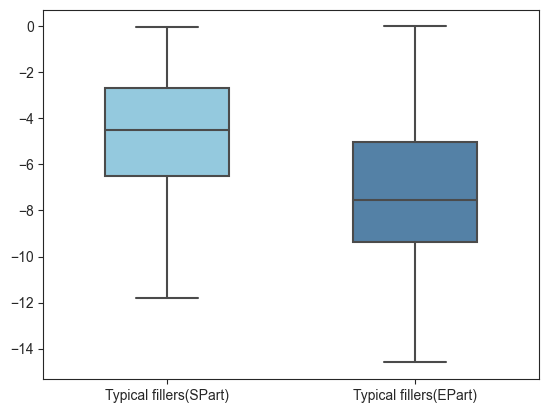

In [143]:
boxplot_comparison_typical(ellipsis_df, 'Score1_GPT', 'Score2_GPT')

<AxesSubplot:>

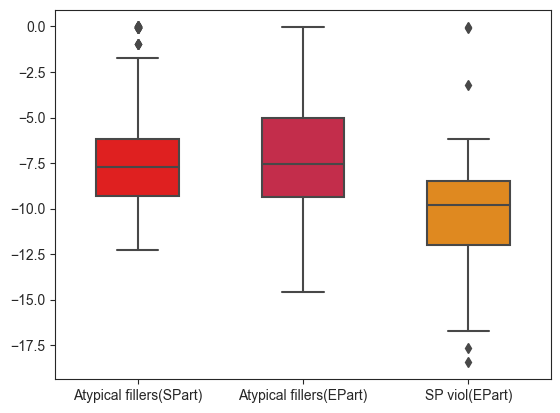

In [144]:


boxplot_comparison_atypical_viol(ellipsis_df, 'Score1_GPT', 'Score2_GPT')